In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
import shutil
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, ResNet101
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO'

In [ ]:
class_names = ["bacterial_spot", "early_blight", "healthy", "late_blight", "leaf_mold", "mosaic_virus", "septoria_spot", "yellow_leaf_curl"]

In [ ]:
# Hitung jumlah gambar dalam setiap kelas
data_distribution = {}
for class_name in class_names:
    class_dir = os.path.join(base_dir, class_name)
    total_images = len([f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.png', '.jpeg', '.JPG'))])
    data_distribution[class_name] = total_images

# Tampilkan hasil
for class_name, count in data_distribution.items():
    print(f"{class_name}: {count} images")

def count_total_images(directory):
    total_images = 0
    for root, dirs, files in os.walk(directory):
        total_images += len(files)  # Jumlah file di setiap subfolder
    return total_images

total_images = count_total_images(base_dir)
print(f"\nTotal jumlah citra di dataset: {total_images}")

bacterial_spot: 745 images
early_blight: 745 images
healthy: 745 images
late_blight: 745 images
leaf_mold: 745 images
mosaic_virus: 745 images
septoria_spot: 745 images
yellow_leaf_curl: 745 images

Total jumlah citra di dataset: 5960


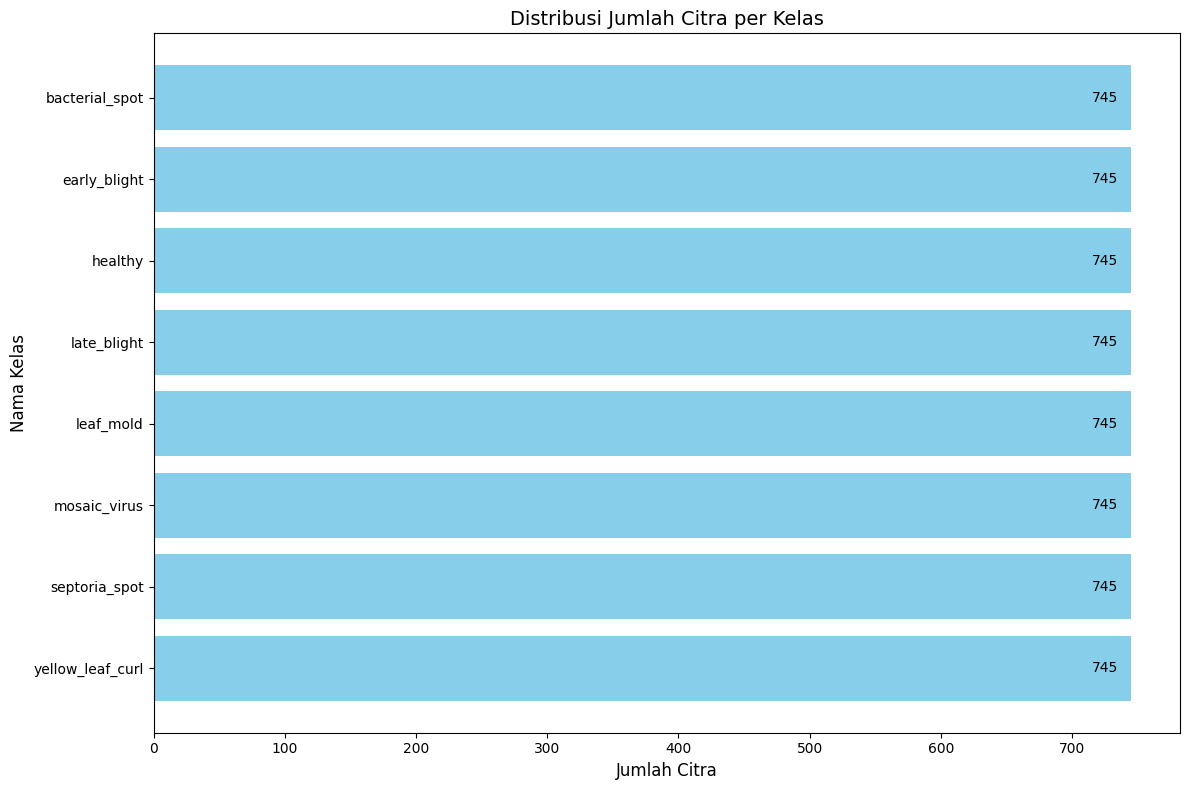

In [ ]:
# Visualisasi dengan Bar Plot Horizontal
fig, ax = plt.subplots(figsize=(12, 8))
class_names_list = list(data_distribution.keys())
image_counts = list(data_distribution.values())

# Membuat bar plot horizontal
bars = ax.barh(class_names_list, image_counts, color='skyblue')

# Menambahkan label nilai di setiap batang
for bar in bars:
    ax.text(bar.get_width() - 10, bar.get_y() + bar.get_height()/2,
            str(int(bar.get_width())), va='center', ha='right', fontsize=10, color='black')

# Menata tampilan plot
ax.set_title("Distribusi Jumlah Citra per Kelas", fontsize=14)
ax.set_xlabel("Jumlah Citra", fontsize=12)
ax.set_ylabel("Nama Kelas", fontsize=12)
ax.invert_yaxis()  # Membalik sumbu Y agar urutan rapi

plt.tight_layout()
plt.show()

In [ ]:
# Direktori tujuan (folder untuk menyimpan gambar yang sudah di-resize)
output_folder = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO-resize'

# Ukuran yang diinginkan (misalnya 224x224)
target_size = (224, 224)

# Pastikan folder tujuan ada, jika tidak buat folder baru
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop untuk menjelajahi semua subfolder dan file gambar
for subdir, dirs, files in os.walk(base_dir):
    for filename in files:
        # Periksa ekstensi file untuk memproses gambar
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(subdir, filename)
            img = cv2.imread(img_path)

            if img is None:
                print(f"Gambar tidak bisa dibaca: {filename}")
                continue

            # Buat subfolder di output jika tidak ada
            rel_path = os.path.relpath(subdir, base_dir)
            output_subdir = os.path.join(output_folder, rel_path)
            if not os.path.exists(output_subdir):
                os.makedirs(output_subdir)

            # Tentukan jalur simpan gambar yang sudah diresize
            output_path = os.path.join(output_subdir, filename)

            # Cek apakah gambar sudah ada di folder tujuan
            if os.path.exists(output_path):
                print(f"Citra telah diresize: {output_path}")
                continue

            # Resize gambar ke ukuran target
            resized_img = cv2.resize(img, target_size)

            # Simpan gambar yang sudah diresize ke folder tujuan
            cv2.imwrite(output_path, resized_img)
            print(f"Berhasil menyimpan gambar di: {output_path}")
        else:
            print(f"File bukan gambar: {filename}")


Streaming output truncated to the last 5000 lines.
Citra telah diresize: /content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO-resize/late_blight/late_blight_24.png
Citra telah diresize: /content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO-resize/late_blight/late_blight_39.JPG
Citra telah diresize: /content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO-resize/late_blight/late_blight_495.JPG
Citra telah diresize: /content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO-resize/late_blight/late_blight_381.JPG
Citra telah diresize: /content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO-resize/late_blight/late_blight_156.JPG
Citra telah diresize: /content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO-resize/late_blight/late_blight_622.JPG
Citra telah diresize: /content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO-resize/late_blight/late_blight_274.JPG
Citra telah diresize: /content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO-resize/late_blight/late_blight_701.JPG
Citra telah diresize: /content/drive/MyDrive/MACHINE LE

In [ ]:
base_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO-resize'

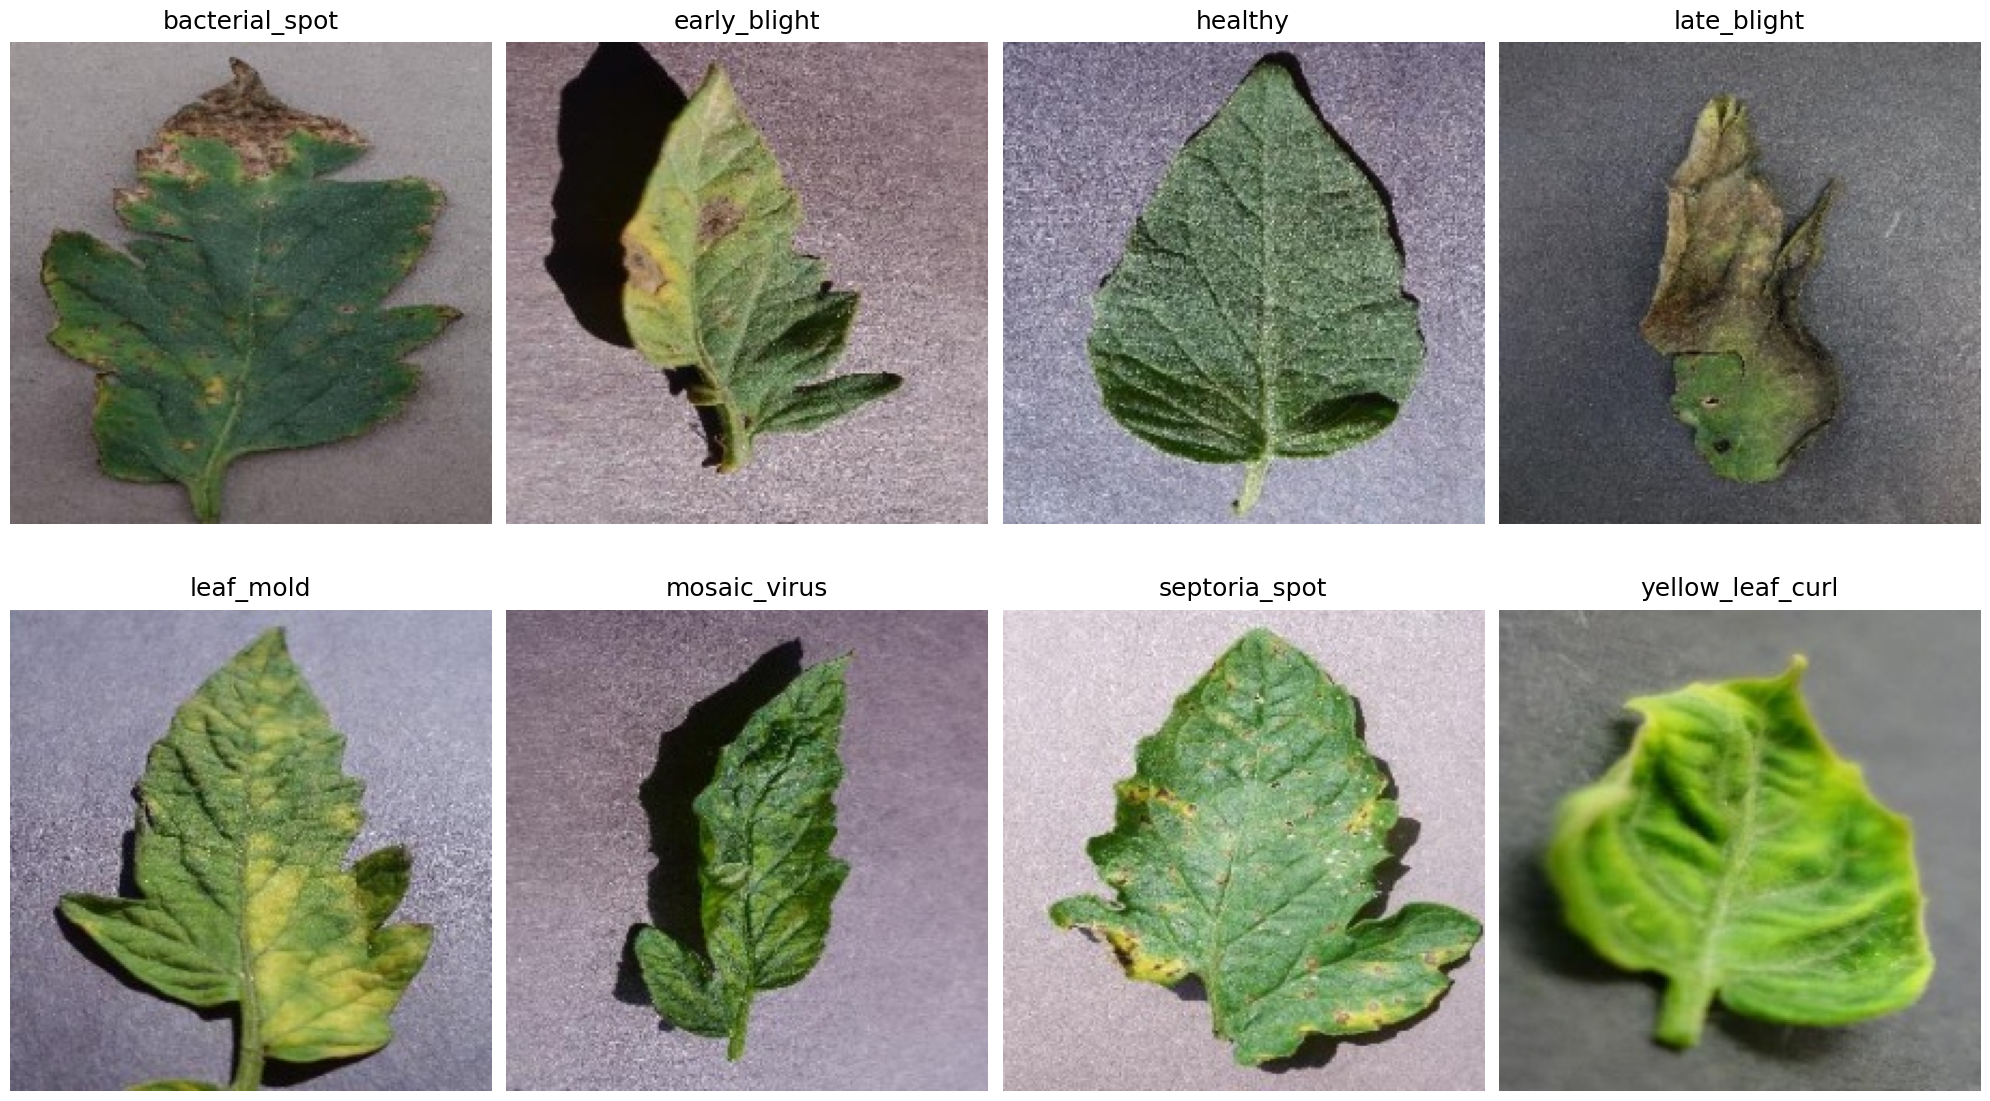

In [ ]:
images = []

for leaf_dir in class_names:
    leaf_items = os.listdir(os.path.join(base_dir, leaf_dir))

    if leaf_items:
      selected_images = np.random.choice(leaf_items)
      images.append(os.path.join(base_dir, leaf_dir, selected_images))

# Visualization
fig = plt.figure(1, figsize=(20, 12))
for subplot, image_ in enumerate(images):
    category = image_.split("/")[-2]
    imgs = plt.imread(image_)
    fig = plt.subplot(2, 4, subplot + 1)
    fig.set_title(category, pad=10, size=18)
    plt.imshow(imgs)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Augmentasi Data

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO-resize'
output_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO_AUGMENTED'

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_images(input_path, output_path, target_per_class=1350):
    os.makedirs(output_path, exist_ok=True)

    for class_name in os.listdir(input_path):
        class_input_dir = os.path.join(input_path, class_name)
        class_output_dir = os.path.join(output_path, class_name)
        os.makedirs(class_output_dir, exist_ok=True)

        if not os.path.isdir(class_input_dir):
            continue

        # Mengecek jumlah citra di direktori output
        existing_images = len([
            file for file in os.listdir(class_output_dir)
            if file.endswith(('.jpg', '.png', '.jpeg', '.JPG'))
        ])

        # Skip augmentasi jika jumlah citra sudah mencukupi
        if existing_images >= target_per_class:
            print(f"Augmentasi diskip untuk kelas '{class_name}' (Jumlah citra: {existing_images})")
            continue

        print(f"Memproses kelas: {class_name}")
        image_count = existing_images
        for img_name in os.listdir(class_input_dir):
            img_path = os.path.join(class_input_dir, img_name)
            if img_path.endswith(('.jpg', '.png', '.jpeg', '.JPG')):
                img = tf.keras.utils.load_img(img_path)
                img_array = tf.keras.utils.img_to_array(img)
                img_array = img_array.reshape((1,) + img_array.shape)

                prefix = os.path.splitext(img_name)[0]
                i = 0
                for batch in datagen.flow(img_array, batch_size=1,
                                          save_to_dir=class_output_dir,
                                          save_prefix=prefix, save_format='jpg'):
                    i += 1
                    image_count += 1
                    if image_count >= target_per_class:
                        break
                if image_count >= target_per_class:
                    break
        print(f"Jumlah citra augmentasi di kelas '{class_name}': {image_count}")


augment_images(base_dir, output_dir, target_per_class=1350)

print("\nProses augmentasi selesai.")

Memproses kelas: leaf_mold
Jumlah citra augmentasi di kelas 'leaf_mold': 1350
Memproses kelas: late_blight
Jumlah citra augmentasi di kelas 'late_blight': 1350
Memproses kelas: septoria_spot
Jumlah citra augmentasi di kelas 'septoria_spot': 1350
Memproses kelas: yellow_leaf_curl
Jumlah citra augmentasi di kelas 'yellow_leaf_curl': 1350
Memproses kelas: early_blight
Jumlah citra augmentasi di kelas 'early_blight': 1350
Memproses kelas: mosaic_virus
Jumlah citra augmentasi di kelas 'mosaic_virus': 1350
Memproses kelas: bacterial_spot
Jumlah citra augmentasi di kelas 'bacterial_spot': 1350
Memproses kelas: healthy
Jumlah citra augmentasi di kelas 'healthy': 1350

Proses augmentasi selesai.


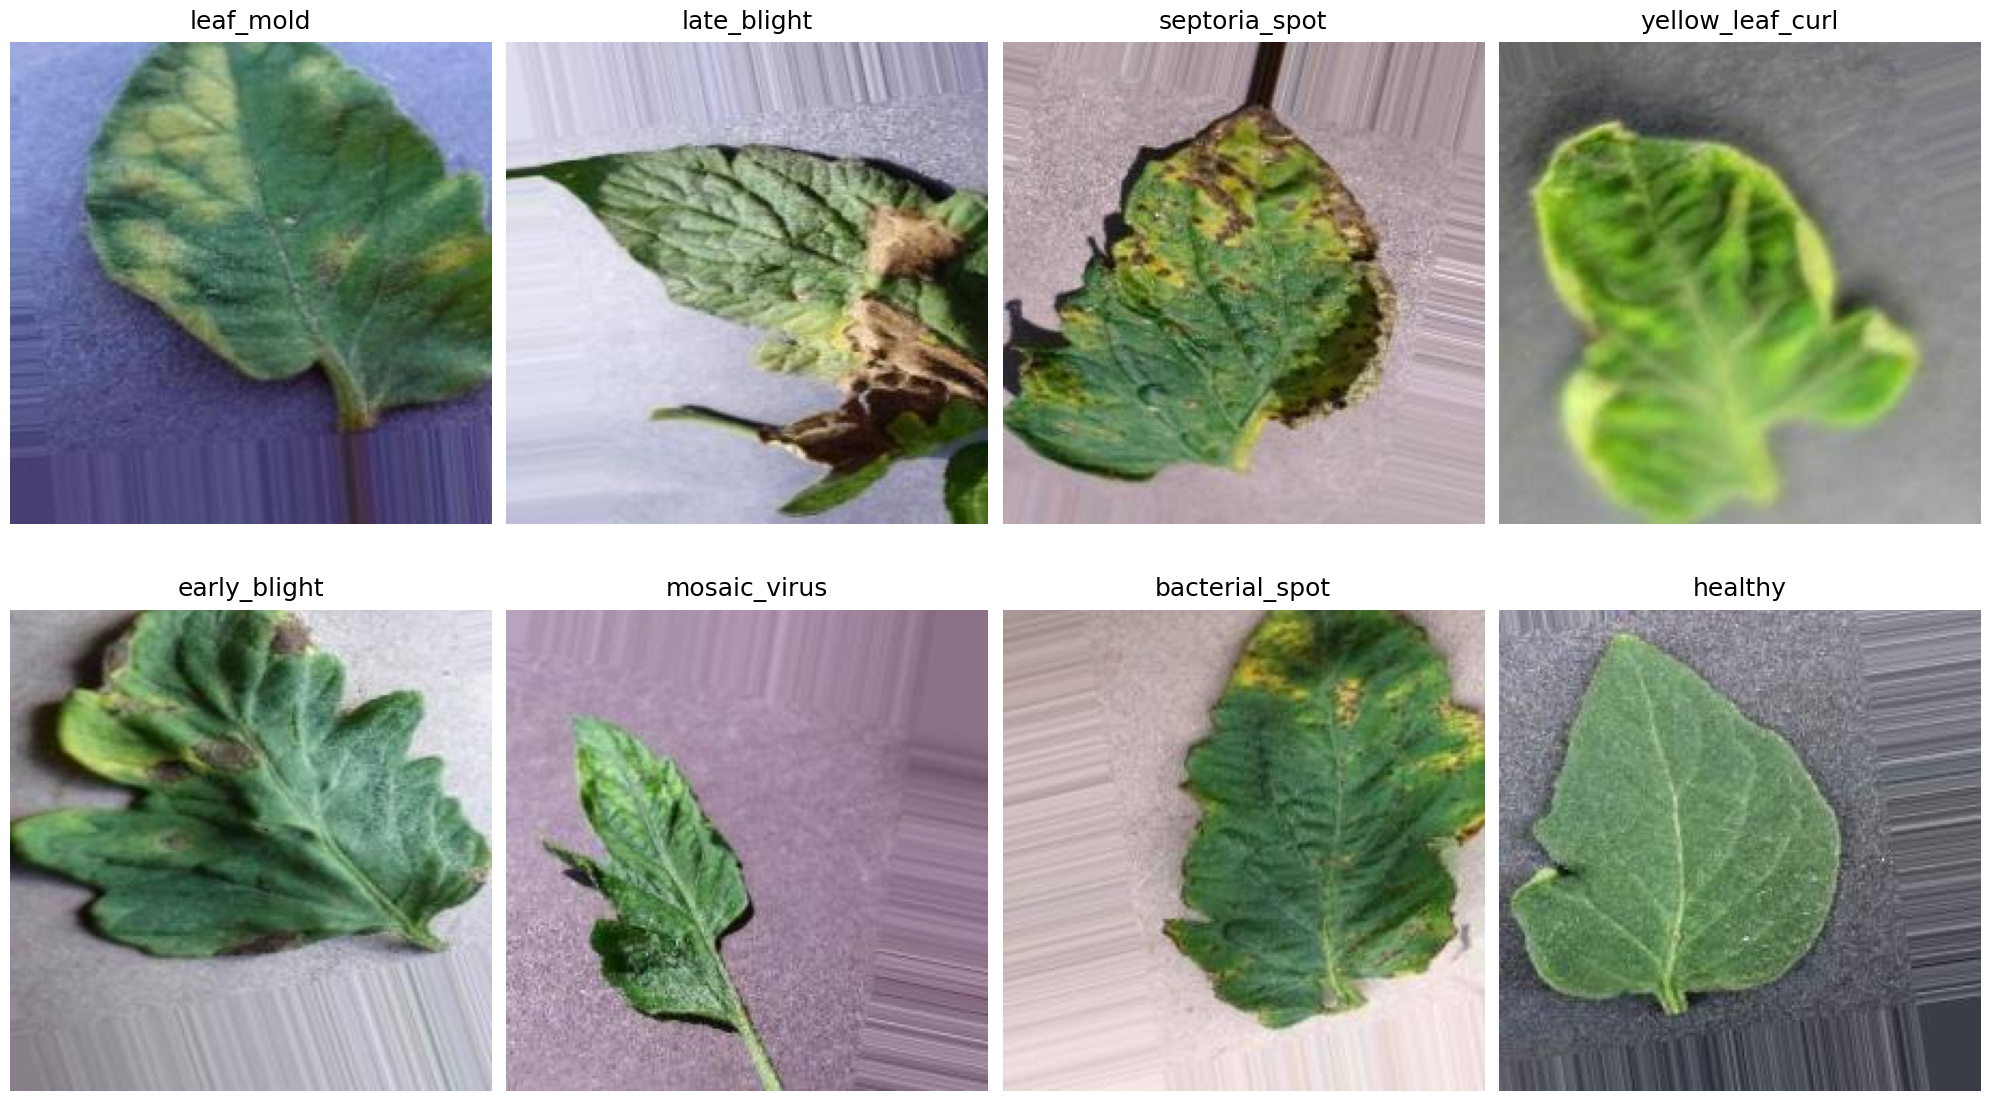

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

augmented_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO_AUGMENTED'
class_names = os.listdir(augmented_dir)

images = []

for class_name in class_names:
    class_dir = os.path.join(augmented_dir, class_name)
    leaf_items = os.listdir(class_dir)

    if leaf_items:
        selected_image = np.random.choice(leaf_items)
        images.append(os.path.join(class_dir, selected_image))

fig = plt.figure(1, figsize=(20, 12))

for i, image_path in enumerate(images):
    category = image_path.split("/")[-2]
    img = plt.imread(image_path)
    plt.subplot(2, 4, i + 1)
    plt.title(category, pad=10, size=18)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
augmented_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO_AUGMENTED'

# Hitung jumlah gambar dalam setiap kelas
data_distribution = {}
for class_name in class_names:
    class_dir = os.path.join(augmented_dir, class_name)
    total_images = len([f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.png', '.jpeg', '.JPG'))])
    data_distribution[class_name] = total_images

# Tampilkan hasil
for class_name, count in data_distribution.items():
    print(f"{class_name}: {count} images")

def count_total_images(directory):
    total_images = 0
    for root, dirs, files in os.walk(directory):
        total_images += len(files)  # Jumlah file di setiap subfolder
    return total_images

total_images = count_total_images(augmented_dir)
print(f"\nTotal jumlah citra di dataset setelah augmentasi: {total_images}")

leaf_mold: 1270 images
late_blight: 1262 images
septoria_spot: 1253 images
yellow_leaf_curl: 1264 images
early_blight: 1264 images
mosaic_virus: 1256 images
bacterial_spot: 1275 images
healthy: 1278 images

Total jumlah citra di dataset setelah augmentasi: 10122


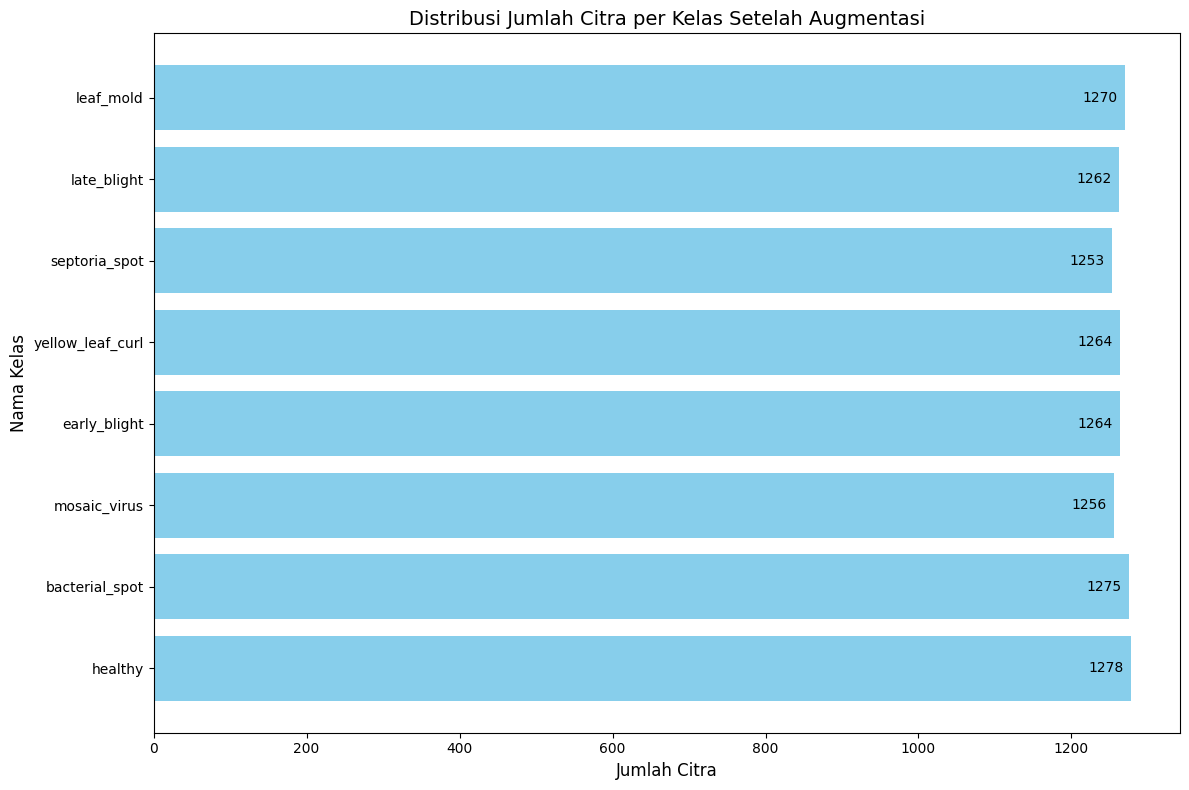

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
class_names_list = list(data_distribution.keys())
image_counts = list(data_distribution.values())

bars = ax.barh(class_names_list, image_counts, color='skyblue')

for bar in bars:
    ax.text(bar.get_width() - 10, bar.get_y() + bar.get_height()/2,
            str(int(bar.get_width())), va='center', ha='right', fontsize=10, color='black')

ax.set_title("Distribusi Jumlah Citra per Kelas Setelah Augmentasi", fontsize=14)
ax.set_xlabel("Jumlah Citra", fontsize=12)
ax.set_ylabel("Nama Kelas", fontsize=12)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
split_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO_SPLIT'

# Buat direktori baru untuk split dataset
train_dir = os.path.join(split_dir, 'train')
val_dir = os.path.join(split_dir, 'validation')
test_dir = os.path.join(split_dir, 'test')

for folder in [train_dir, val_dir, test_dir]:
    if not os.path.exists(folder):
        os.makedirs(folder)

# Proporsi split
train_split = 0.8
val_split = 0.1
test_split = 0.1


for class_name in class_names:
    class_path = os.path.join(augmented_dir, class_name)
    images = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png', '.JPEG'))]
    random.shuffle(images)  # Acak urutan gambar

    train_count = int(len(images) * train_split)
    val_count = int(len(images) * val_split)

    # Alokasikan gambar ke train, validation, dan test
    train_images = images[:train_count]
    val_images = images[train_count:train_count + val_count]
    test_images = images[train_count + val_count:]

    # Buat subfolder per kelas
    for subfolder, img_list in zip(['train', 'validation', 'test'],
                                   [train_images, val_images, test_images]):
        target_dir = os.path.join(split_dir, subfolder, class_name)
        os.makedirs(target_dir, exist_ok=True)

        for img_name in img_list:
            src = os.path.join(class_path, img_name)
            dst = os.path.join(target_dir, img_name)
            shutil.copy2(src, dst)

print("Split data selesai.")

Split data selesai.


In [ ]:
train_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO_SPLIT/train'
val_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO_SPLIT/validation'
test_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO_SPLIT/test'

In [ ]:
import tensorflow as tf

split_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO_SPLIT'

image_size = (224, 224)
batch_size = 32

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(f"Training data: {train_data.samples} images")
print(f"Validation data: {val_data.samples} images")
print(f"Testing data: {test_data.samples} images")

Found 8095 images belonging to 8 classes.
Found 1009 images belonging to 8 classes.
Found 1018 images belonging to 8 classes.
Training data: 8095 images
Validation data: 1009 images
Testing data: 1018 images


# MobileNet

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(train_data.class_indices), activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

# Membekukan layer MobileNet (opsional, bisa fine-tuning nanti)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,422,984 (9.24 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - accuracy: 0.1508 - loss: 2.6999 - val_accuracy: 0.6323 - val_loss: 1.4051
Epoch 2/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 491s 2s/step - accuracy: 0.4444 - loss: 1.5507 - val_accuracy: 0.9871 - val_loss: 0.7344
Epoch 3/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 488s 2s/step - accuracy: 0.7384 - loss: 0.9421 - val_accuracy: 1.0000 - val_loss: 0.3349
Epoch 4/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 457s 2s/step - accuracy: 0.9068 - loss: 0.5383 - val_accuracy: 1.0000 - val_loss: 0.1599
Epoch 5/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 503s 2s/step - accuracy: 0.9589 - loss: 0.3399 - val_accuracy: 1.0000 - val_loss: 0.0841
Epoch 6/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1073s 4s/step - accuracy: 0.9841 - loss: 0.2165 - val_accuracy: 1.0000 - val_loss: 0.0492
Epoch 7/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 468s 2s/step - accuracy: 0.9905 - loss: 0.1489 - val_accuracy: 1.0000 - val_loss: 0.0310
Epoch 8/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 468s 2s/step - accuracy: 0.9927 - loss: 0.1095 - val_acc

In [ ]:
test_loss, test_acc = model.evaluate(test_data, verbose=2)
print(f"\nAkurasi model pada data test: {test_acc:.2f}")

32/32 - 205s - 6s/step - accuracy: 1.0000 - loss: 0.0013

Akurasi model pada data test: 1.00


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)

32/32 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step
Classification Report:
                  precision    recall  f1-score   support

  bacterial_spot       1.00      1.00      1.00       128
    early_blight       1.00      1.00      1.00       127
         healthy       1.00      1.00      1.00       129
     late_blight       1.00      1.00      1.00       127
       leaf_mold       1.00      1.00      1.00       127
    mosaic_virus       1.00      1.00      1.00       127
   septoria_spot       1.00      1.00      1.00       126
yellow_leaf_curl       1.00      1.00      1.00       127

        accuracy                           1.00      1018
       macro avg       1.00      1.00      1.00      1018
    weighted avg       1.00      1.00      1.00      1018



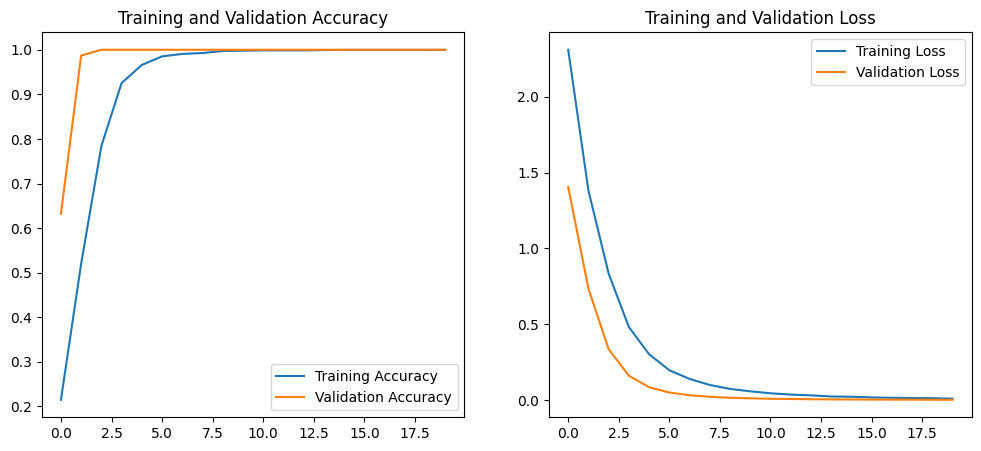

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

32/32 - 57s - 2s/step


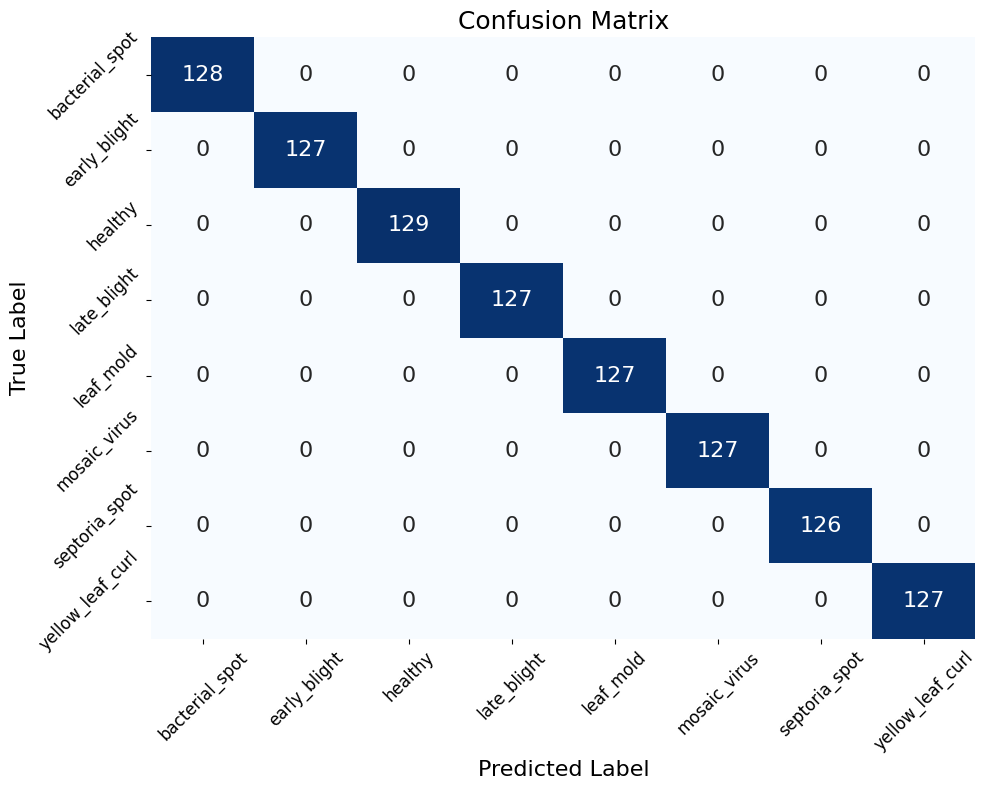

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_pred = model.predict(test_data, verbose=2)
test_pred_class = np.argmax(test_pred, axis=1)
test_true_class = test_data.classes
cm = confusion_matrix(test_true_class, test_pred_class)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys(), cbar=False, annot_kws={'size': 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
model.save("UAP_MobileNet.keras")

# ResNet101

In [30]:
train_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO_SPLIT/train'
val_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO_SPLIT/validation'
test_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO_SPLIT/test'

In [32]:
import tensorflow as tf

split_dir = '/content/drive/MyDrive/MACHINE LEARNING/UAP-TOMATO_SPLIT'

image_size = (224, 224)
batch_size = 32

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(f"Training data: {train_data.samples} images")
print(f"Validation data: {val_data.samples} images")
print(f"Testing data: {test_data.samples} images")

Found 8095 images belonging to 8 classes.
Found 1009 images belonging to 8 classes.
Found 1018 images belonging to 8 classes.
Training data: 8095 images
Validation data: 1009 images
Testing data: 1018 images


In [33]:
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(len(train_data.class_indices), activation='softmax')(x)

In [25]:
# model = Model(inputs=base_model.input, outputs=predictions)

# # Membekukan layer ResNet (opsional, bisa fine-tuning nanti)
# for layer in base_model.layers:
#     layer.trainable = False

In [34]:
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 43,184,776 (164.74 MB)

 Trainable params: 526,600 (2.01 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
 66/253 ━━━━━━━━━━━━━━━━━━━━ 34:51 11s/step - accuracy: 0.1094 - loss: 2.6161

In [ ]:
test_loss, test_acc = model.evaluate(test_data, verbose=2)
print(f"\nAkurasi model pada data test: {test_acc:.2f}")

32/32 - 300s - 9s/step - accuracy: 0.3271 - loss: 1.7467

Akurasi model pada data test: 0.33


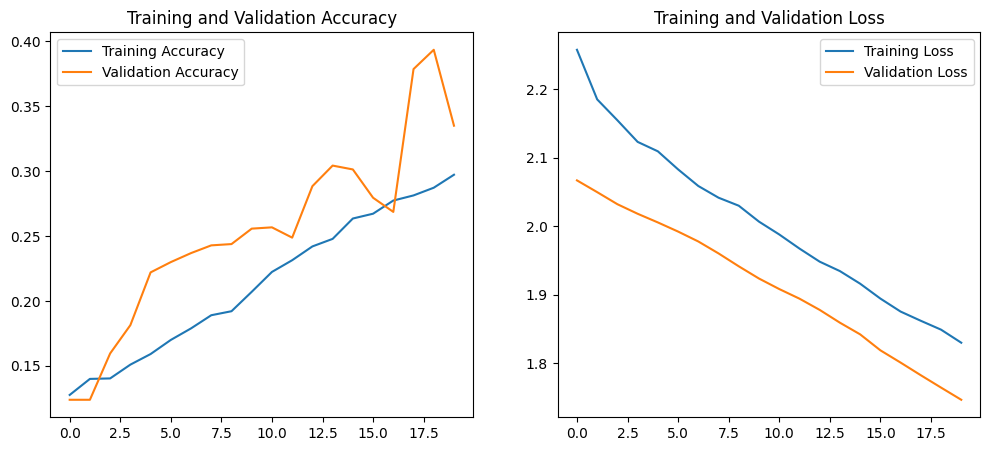

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_pred = model.predict(test_data, verbose=2)
test_pred_class = np.argmax(test_pred, axis=1)
test_true_class = test_data.classes
cm = confusion_matrix(test_true_class, test_pred_class)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys(), cbar=False, annot_kws={'size': 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()



In [ ]:
model.save("UAP_ResNet.keras")